#                          **Disease Diagnosis Model**

##                               *Akshay Bhala*
###                                  *04/04/2020*




## Introduction: 
The Goal is to build a disease diagnosis model to predict whether or not a patient has certain unspecified disease or not for a given binary classification problem. We are using multiple machine learning algorithms, such as naive Bayes classifier, K Nearest Neighbor, Support Vector Machine (with both linear and non-linear kernel functions), Random Forest and Gradient Boosting Classifier for building the model.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV

# Section 1: Data preparation

In [0]:
df = pd.read_csv('Disease Prediction Training.csv')
print(df.shape)
df.describe()

(49000, 12)


,Age,Height,Weight,High Blood Pressure,Low Blood Pressure,Smoke,Alcohol,Exercise,Disease
count,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000
mean,52.853306,164.366878,74.190527,128.698939,96.917367,0.088265,0.054245,0.803204,0.499959
std,6.763065,8.216637,14.329934,147.624582,200.368069,0.283683,0.226503,0.397581,0.500005
min,29.000000,55.000000,10.000000,-150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,207.000000,200.000000,14020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
df.isnull().sum()

Age                    0
Gender                 0
Height                 0
Weight                 0
High Blood Pressure    0
Low Blood Pressure     0
Cholesterol            0
Glucose                0
Smoke                  0
Alcohol                0
Exercise               0
Disease                0
dtype: int64

**Analysis:** From the above summary we can see that the data set does not contain Null Values but has some data quality issues such as consisting negative blood pressure values and outliers. 

Text(0.5, 0, 'Low Blood Pressure')

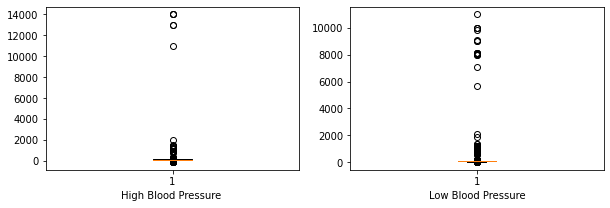

In [0]:
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(df['High Blood Pressure'])
ax1.set_xlabel('High Blood Pressure ')
ax2.boxplot(df['Low Blood Pressure'])
ax2.set_xlabel('Low Blood Pressure')

In [0]:
print(df.Disease.value_counts())
countNoDisease = len(df[df.Disease == 0])
countHaveDisease = len(df[df.Disease == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.Disease))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.Disease))*100)))

0    24502
1    24498
Name: Disease, dtype: int64
Percentage of Patients Haven't Heart Disease: 50.00%
Percentage of Patients Have Heart Disease: 50.00%


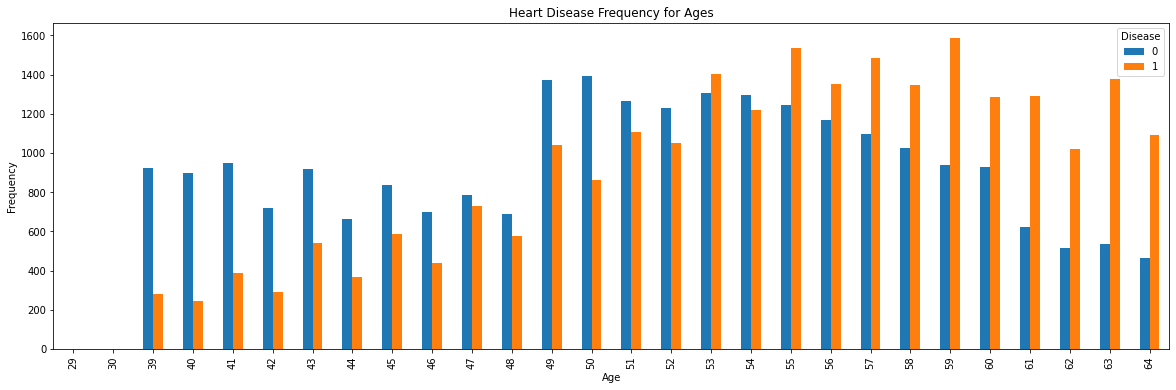

In [0]:
pd.crosstab(df.Age,df.Disease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Analysis:** The above graph shows a pattern that as Age increases the chances of getting a Disease is High.

Percentage of Female Patients: 65.03%
Percentage of Male Patients: 34.97%


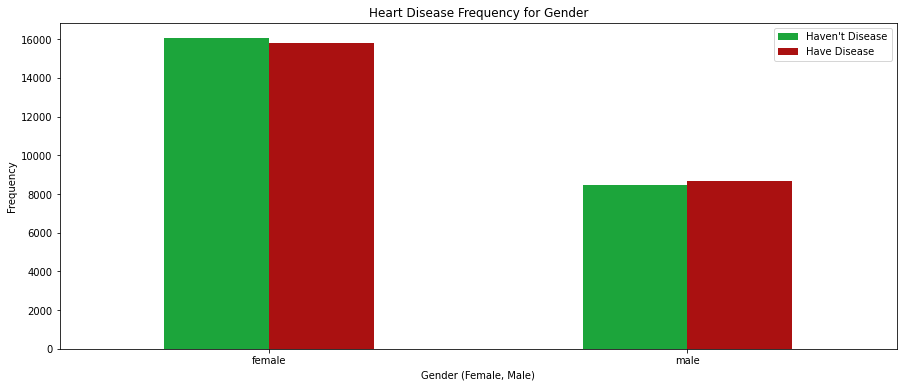

In [0]:
countFemale = len(df[df.Gender == 'female'])
countMale = len(df[df.Gender == 'male'])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.Gender))*100)))
pd.crosstab(df.Gender,df.Disease).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Gender')
plt.xlabel('Gender (Female, Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**Analysis:** Female Patients are twice as Male Patients

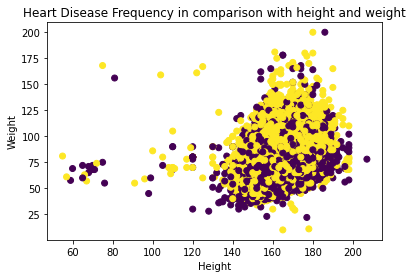

In [0]:
plt.scatter(df.Height,df.Weight,c=df.Disease)
plt.title('Heart Disease Frequency in comparison with height and weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

**Analysis:** The above plot shows an very important characteristic that within the average height which is between 140 - 180 as the weight goes beyond 75 there is a high risk of getting the Disease.

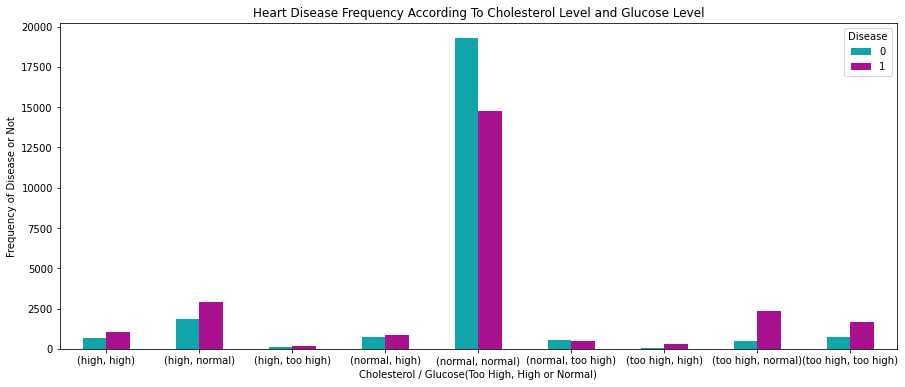

In [0]:
pd.crosstab([df.Cholesterol,df.Glucose],df.Disease).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Cholesterol Level and Glucose Level')
plt.xlabel('Cholesterol / Glucose(Too High, High or Normal)')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

**Analysis:** We can see that when cholestrol is high/too high as compared to when glucose is normal there are more number of chances getting a disease. Although when both are high there is a definite chance of getting the disease.

Performing One hot Encoding for categorical columns in our data set and using inter quartile range to remove outliers and making sure our data is ready for machine learning models.

In [0]:
a = pd.get_dummies(df['Gender'], prefix = "Gender_")
b = pd.get_dummies(df['Cholesterol'], prefix = "Cholesterol_")
c = pd.get_dummies(df['Glucose'], prefix = "Glucose_")

In [0]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df = df.drop(columns = ['Gender', 'Cholesterol', 'Glucose'])

In [0]:
def outliers_IQR(data, col):
    lower_quartile = data[col].quantile(0.25)
    upper_quartile = data[col].quantile(0.75)
    IQR = upper_quartile - lower_quartile
    outlier_thresh = 1.5 * IQR
    return data[data[col].between((lower_quartile - outlier_thresh), (upper_quartile + outlier_thresh))]

df = outliers_IQR(df, 'High Blood Pressure')
df = outliers_IQR(df, 'Low Blood Pressure')

Text(0.5, 0, 'Low Blood Pressure')

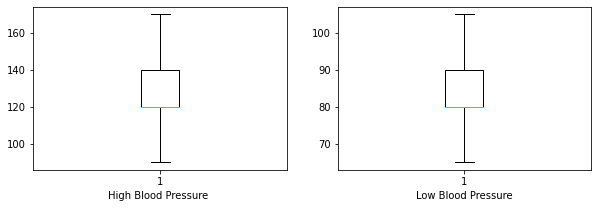

In [0]:
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(df['High Blood Pressure'])
ax1.set_xlabel('High Blood Pressure ')
ax2.boxplot(df['Low Blood Pressure'])
ax2.set_xlabel('Low Blood Pressure')

**Analysis:** The above figure proofs that outliers are treated for both the columns.

In [0]:
df.describe()

,Age,Height,Weight,High Blood Pressure,Low Blood Pressure,Smoke,Alcohol,Exercise,Disease,Gender__female,Gender__male,Cholesterol__high,Cholesterol__normal,Cholesterol__too high,Glucose__high,Glucose__normal,Glucose__too high
count,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000,45143.000000
mean,52.922048,164.467559,74.254302,126.652083,81.807855,0.087987,0.053541,0.803247,0.498859,0.647852,0.352148,0.133908,0.750770,0.115322,0.072547,0.850918,0.076535
std,6.739011,8.142508,14.087040,14.356218,7.745571,0.283279,0.225112,0.397548,0.500004,0.477645,0.477645,0.340557,0.432572,0.319414,0.259395,0.356173,0.265854
min,29.000000,55.000000,11.000000,90.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,207.000000,200.000000,170.000000,105.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


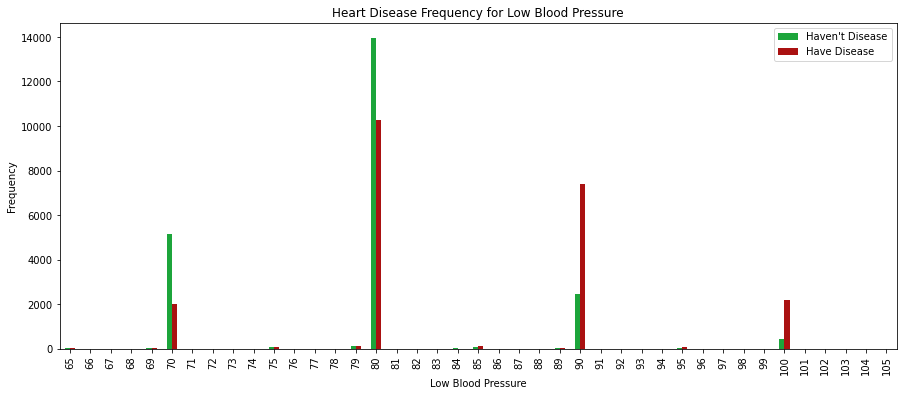

In [0]:
pd.crosstab(df['Low Blood Pressure'],df.Disease).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Low Blood Pressure')
plt.xlabel('Low Blood Pressure')
plt.xticks(rotation=90)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**Analysis:** The Normal Range of Blood pressure is 90 to 120 and as we can see when blood pressure falls below 90 there are more number of patients having a chance of a disease. 


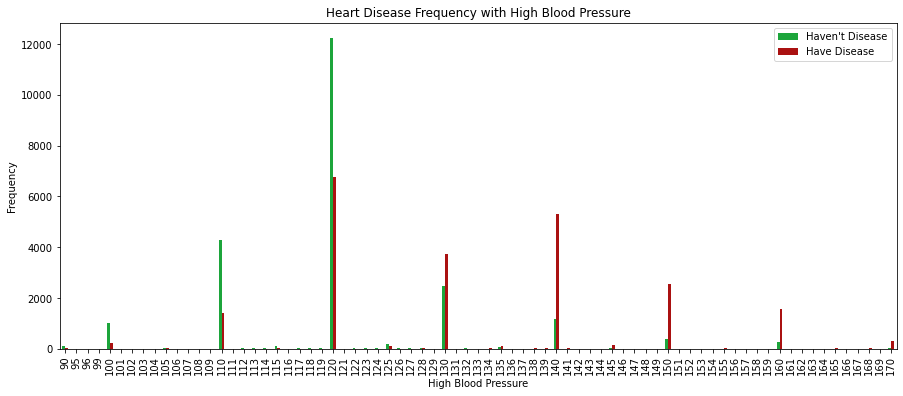

In [0]:
df['High Blood Pressure']=df['High Blood Pressure'].abs()
pd.crosstab(df['High Blood Pressure'],df.Disease).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency with High Blood Pressure')
plt.xlabel('High Blood Pressure')
plt.xticks(rotation=90)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**Analysis:** The Normal Range of Blood pressure is 90 to 120 and as we can see the more the increase in blood pressure more are the chances of getting a disease.

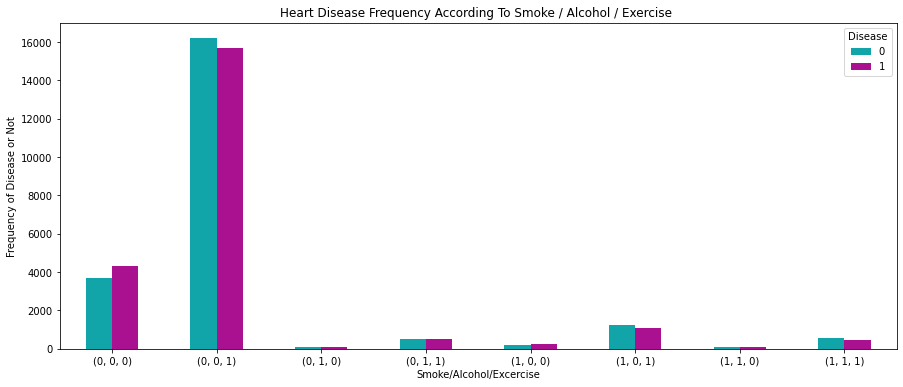

In [0]:
pd.crosstab([df.Smoke,df.Alcohol,df.Exercise],df.Disease).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Smoke / Alcohol / Exercise ')
plt.xlabel('Smoke/Alcohol/Excercise')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

**Analysis:** We can see an interesting characteristic that when people smoke and drink alcohol and don't do exercise they are at higher risk of getting disease.
 

#Section 2: Build, tune and evaluate various machine learning algorithms

In [0]:
y = df.Disease.values

In [0]:
x_data = df.drop(['Disease'], axis = 1)

In [0]:
# Scaling data
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [0]:
#transpose matrices

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [0]:
ns_probs = [0 for _ in range(len(y_test.T))]

1. Naive Bayes Classifier

In [0]:
from sklearn.naive_bayes import GaussianNB
nb_G = GaussianNB()
nb_G = nb_G.fit(x_train.T, y_train.T)
prediction = nb_G.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,prediction))
print("\n Classification Report \n",classification_report(y_test.T, prediction))


 Confusion Matrix 
 [[5330 1509]
 [2775 3929]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.66      0.78      0.71      6839
           1       0.72      0.59      0.65      6704

    accuracy                           0.68     13543
   macro avg       0.69      0.68      0.68     13543
weighted avg       0.69      0.68      0.68     13543



In [0]:
from sklearn.naive_bayes import BernoulliNB
nb_B = BernoulliNB()
nb_B = nb_B.fit(x_train.T, y_train.T)
prediction = nb_B.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,prediction))
print("\n Classification Report \n",classification_report(y_test.T, prediction))


 Confusion Matrix 
 [[5416 1423]
 [4021 2683]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.57      0.79      0.67      6839
           1       0.65      0.40      0.50      6704

    accuracy                           0.60     13543
   macro avg       0.61      0.60      0.58     13543
weighted avg       0.61      0.60      0.58     13543



In [0]:
from sklearn.naive_bayes import MultinomialNB
nb_M = MultinomialNB()
nb_M = nb_M.fit(x_train.T, y_train.T)
prediction = nb_M.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,prediction))
print("\n Classification Report \n",classification_report(y_test.T, prediction))


 Confusion Matrix 
 [[5454 1385]
 [4018 2686]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.58      0.80      0.67      6839
           1       0.66      0.40      0.50      6704

    accuracy                           0.60     13543
   macro avg       0.62      0.60      0.58     13543
weighted avg       0.62      0.60      0.58     13543



No Disease: ROC AUC=0.500
Disease: ROC AUC=0.760


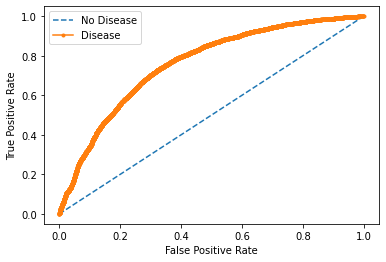

In [0]:
lr_probs = nb_G.predict_proba(x_test.T)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test.T, ns_probs)
lr_auc = roc_auc_score(y_test.T, lr_probs)
# summarize scores
print('No Disease: ROC AUC=%.3f' % (ns_auc))
print('Disease: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test.T, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test.T, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Disease')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Disease')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Analysis:** As Observed above the best performing classifier between Guassian Naive Bayes, Bernoulli Naive Bayes and Multinomial Naive Bayes is the Guassian Naive Bayes classifier. It has accuracy of 68% along with 68% recall and 69% precision.Therefore it is our best model.

**Note:** For each algorithm i have followed the same approach:
*   Step1: Running Base Model
*   Step2: Tunning Hyperparameter and printing Best Parameter
*   Step3: Training the model with best parameter and printing prediction results and classification report with confusion matrix
*   Step4: Calculating AUROC and plotting ROC curve
*   Step5: Detailed Explaination of the mentioned Algorithm














2. KNN Classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)  
knn = knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,prediction))
print("\n Classification Report \n",classification_report(y_test.T, prediction))


 Confusion Matrix 
 [[4662 2177]
 [2149 4555]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.68      0.68      6839
           1       0.68      0.68      0.68      6704

    accuracy                           0.68     13543
   macro avg       0.68      0.68      0.68     13543
weighted avg       0.68      0.68      0.68     13543



In [0]:
n_neighbors = list(range(1,30))
#Convert to dictionary
hyperparameters = dict( n_neighbors=n_neighbors)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x_train.T, y_train.T)
grid_predictions = best_model.predict(x_test.T)
#Print The value of best Hyperparameters
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best n_neighbors: 26


In [0]:
knn_best = KNeighborsClassifier(n_neighbors=26)  
knn_best = knn_best.fit(x_train.T, y_train.T)
prediction = knn_best.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,prediction))
print("\n Classification Report \n",classification_report(y_test.T, prediction))


 Confusion Matrix 
 [[5311 1528]
 [2176 4528]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.71      0.78      0.74      6839
           1       0.75      0.68      0.71      6704

    accuracy                           0.73     13543
   macro avg       0.73      0.73      0.73     13543
weighted avg       0.73      0.73      0.73     13543



No Disease: ROC AUC=0.500
Disease: ROC AUC=0.787


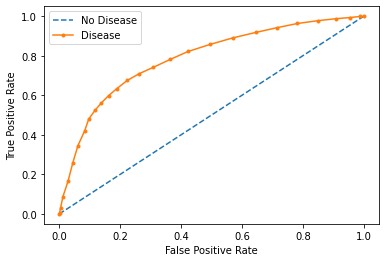

In [0]:
lr_probs = knn_best.predict_proba(x_test.T)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test.T, ns_probs)
lr_auc = roc_auc_score(y_test.T, lr_probs)
# summarize scores
print('No Disease: ROC AUC=%.3f' % (ns_auc))
print('Disease: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test.T, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test.T, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Disease')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Disease')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Analysis:** n_neighbors=1 means each sample is using itself as reference, that’s an overfitting case. For our data, increasing the number of neighbors improves the test scores After Tuning we get 26 as the best n_neighbour giving us accuracy of 73% higher than base model along with both precision and recall as 73%

3. Linear SVM

In [0]:
from sklearn.svm import SVC
svm_L = SVC(kernel='linear')
svm_L = svm_L.fit(x_train.T, y_train.T)
predictions = svm_L.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,predictions))
print("\n Classification report \n",classification_report(y_test.T,predictions))


 Confusion Matrix 
 [[5608 1231]
 [2422 4282]]

 Classification report 
               precision    recall  f1-score   support

           0       0.70      0.82      0.75      6839
           1       0.78      0.64      0.70      6704

    accuracy                           0.73     13543
   macro avg       0.74      0.73      0.73     13543
weighted avg       0.74      0.73      0.73     13543



In [0]:
param_grid = {'C': [0.1,1,10], 'kernel': ['linear']} 
grid = GridSearchCV(SVC(),param_grid,n_jobs=3)
grid = grid.fit(x_train.T,y_train.T)
grid_predictions = grid.predict(x_test.T)
print("\n Best Parameters \n",grid.best_params_)


 Best Parameters 
 {'C': 0.1, 'kernel': 'linear'}


In [0]:
from sklearn.svm import SVC
svm_Best = SVC(C=0.1,kernel='linear',probability=True)
svm_Best = svm_Best.fit(x_train.T, y_train.T)
predictions = svm_Best.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,predictions))
print("\n Classification report \n",classification_report(y_test.T,predictions))


 Confusion Matrix 
 [[5615 1224]
 [2429 4275]]

 Classification report 
               precision    recall  f1-score   support

           0       0.70      0.82      0.75      6839
           1       0.78      0.64      0.70      6704

    accuracy                           0.73     13543
   macro avg       0.74      0.73      0.73     13543
weighted avg       0.74      0.73      0.73     13543



No Disease: ROC AUC=0.500
Disease: ROC AUC=0.794


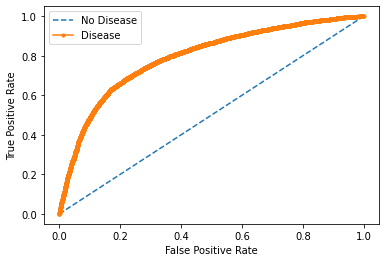

In [0]:
lr_probs = svm_Best.predict_proba(x_test.T)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test.T, ns_probs)
lr_auc = roc_auc_score(y_test.T, lr_probs)
# summarize scores
print('No Disease: ROC AUC=%.3f' % (ns_auc))
print('Disease: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test.T, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test.T, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Disease')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Disease')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Analysis:** Support Vectors Classifier tries to find the best hyperplane to separate the different classes by maximizing the distance between sample points and the hyperplane. Using linear will use a linear hyperplane (a line in the case of 2D data). C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly. Increasing C values may lead to overfitting the training data. Therefore Applying the best parameter which is C = 0.1 for Linear SVM we get 73% accuracy along with 73% recall and 74% precision.

4. NON Linear SVM

In [0]:
svm_NL = SVC(kernel='rbf')
svm_NL.fit(x_train.T, y_train.T)
predictions = svm_NL.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,predictions))
print("\n Classification report \n",classification_report(y_test.T,predictions))


 Confusion Matrix 
 [[5459 1380]
 [2223 4481]]

 Classification report 
               precision    recall  f1-score   support

           0       0.71      0.80      0.75      6839
           1       0.76      0.67      0.71      6704

    accuracy                           0.73     13543
   macro avg       0.74      0.73      0.73     13543
weighted avg       0.74      0.73      0.73     13543



In [0]:
param_grid = {'C': [0.1,1,10],'gamma': [1,0.1,0.01], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,n_jobs=3)
grid = grid.fit(x_train.T,y_train.T)
grid_predictions = grid.predict(x_test.T)
print("\n Best Parameters \n",grid.best_params_)


 Best Parameters 
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [0]:
svm_NL_Best = SVC(C=10,gamma=0.1,kernel='rbf',probability=True)
svm_NL_Best.fit(x_train.T, y_train.T)
predictions = svm_NL_Best.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,predictions))
print("\n Classification report \n",classification_report(y_test.T,predictions))


 Confusion Matrix 
 [[5469 1370]
 [2226 4478]]

 Classification report 
               precision    recall  f1-score   support

           0       0.71      0.80      0.75      6839
           1       0.77      0.67      0.71      6704

    accuracy                           0.73     13543
   macro avg       0.74      0.73      0.73     13543
weighted avg       0.74      0.73      0.73     13543



No Disease: ROC AUC=0.500
Disease: ROC AUC=0.794


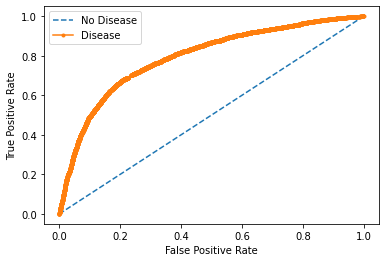

In [0]:
lr_probs = svm_NL_Best.predict_proba(x_test.T)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test.T, ns_probs)
lr_auc = roc_auc_score(y_test.T, lr_probs)
# summarize scores
print('No Disease: ROC AUC=%.3f' % (ns_auc))
print('Disease: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test.T, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test.T, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Disease')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Disease')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Analysis:** rbf uses the non linear hyper plane. gamma is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set. Based on the above observed values by tuning hyperparameters we get more accuracy, recall and precision than the base model. The tuned model for Non-Linear SVM performs with an accuracy of 73% with recall as 73% and precision as 74%.

5. Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train.T, y_train.T)
predictions = rf.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,predictions))
print("\n Classification Report \n",classification_report(y_test.T,predictions))


 Confusion Matrix 
 [[4855 1984]
 [1991 4713]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.71      0.71      0.71      6839
           1       0.70      0.70      0.70      6704

    accuracy                           0.71     13543
   macro avg       0.71      0.71      0.71     13543
weighted avg       0.71      0.71      0.71     13543



In [61]:
from sklearn.ensemble import RandomForestClassifier
param_grid = { 'bootstrap': [True],
    'max_depth': [10, 50, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]} 
grid = GridSearchCV(RandomForestClassifier(),param_grid,n_jobs=3)
grid = grid.fit(x_train.T,y_train.T)
grid_predictions = grid.predict(x_test.T)
print("\n Best Parameters \n",grid.best_params_)


 Best Parameters 
 {'bootstrap': True, 'max_depth': 100, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 300}


In [62]:
rf_best = RandomForestClassifier(bootstrap=True,max_depth=100,max_features=3,min_samples_leaf=5,min_samples_split=12,n_estimators=300)
rf_best.fit(x_train.T, y_train.T)
predictions = rf_best.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,predictions))
print("\n Classification Report \n",classification_report(y_test.T,predictions))


 Confusion Matrix 
 [[5275 1564]
 [2038 4666]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.72      0.77      0.75      6839
           1       0.75      0.70      0.72      6704

    accuracy                           0.73     13543
   macro avg       0.74      0.73      0.73     13543
weighted avg       0.73      0.73      0.73     13543



No Disease: ROC AUC=0.500
Disease: ROC AUC=0.800


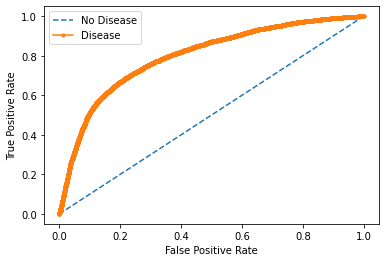

In [63]:
lr_probs = rf_best.predict_proba(x_test.T)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test.T, ns_probs)
lr_auc = roc_auc_score(y_test.T, lr_probs)
# summarize scores
print('No Disease: ROC AUC=%.3f' % (ns_auc))
print('Disease: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test.T, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test.T, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Disease')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Disease')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Analysis:** A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably. max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. As Depth increases there is a chance of overfitting. min_samples_split represents the minimum number of samples required to split an internal node.When we increase this parameter, each tree in the forest becomes more constrained as it has to consider more samples at each node. There is a chance of underfitting when we require all of the sample at each node.min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.Increasing this value can cause underfitting.max_features represents the number of features to consider when looking for the best split. As this value increases there is a chance of overfitting. After tuning random forest model it runs with an accuracy of 73% with a precision of 74% and recall as 73%.

6. Gradient Boosting Classifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier(n_estimators = 100, max_depth = 10, learning_rate = 1.0)
gradient_boosting.fit(x_train.T, y_train.T)
predictions = gradient_boosting.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,predictions))
print("\n Classification Report \n",classification_report(y_test.T,predictions))


 Confusion Matrix 
 [[4478 2361]
 [2243 4461]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.67      0.65      0.66      6839
           1       0.65      0.67      0.66      6704

    accuracy                           0.66     13543
   macro avg       0.66      0.66      0.66     13543
weighted avg       0.66      0.66      0.66     13543



In [65]:
param_grid = {'n_estimators': [100, 200, 300],
    'max_depth': [10, 80, 90],
    'learning_rate': [1.0,3.0,10.0]} 
grid = GridSearchCV(GradientBoostingClassifier(),param_grid,n_jobs=3)
grid = grid.fit(x_train.T,y_train.T)
grid_predictions = grid.predict(x_test.T)
print("\n Best Parameters \n",grid.best_params_)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 Best Parameters 
 {'learning_rate': 1.0, 'max_depth': 90, 'n_estimators': 300}


In [66]:
gb_best = GradientBoostingClassifier(n_estimators=300,max_depth=90,learning_rate=1.0)
gb_best = gb_best.fit(x_train.T, y_train.T)
predictions = gb_best.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,predictions))
print("\n Classification Report \n",classification_report(y_test.T,predictions))


 Confusion Matrix 
 [[4855 1984]
 [2429 4275]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.67      0.71      0.69      6839
           1       0.68      0.64      0.66      6704

    accuracy                           0.67     13543
   macro avg       0.67      0.67      0.67     13543
weighted avg       0.67      0.67      0.67     13543



No Disease: ROC AUC=0.500
Disease: ROC AUC=0.714


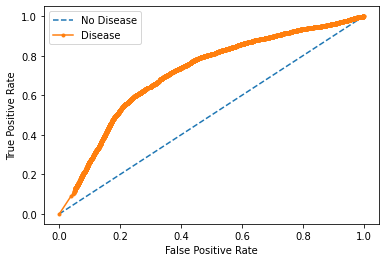

In [67]:
lr_probs = gb_best.predict_proba(x_test.T)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test.T, ns_probs)
lr_auc = roc_auc_score(y_test.T, lr_probs)
# summarize scores
print('No Disease: ROC AUC=%.3f' % (ns_auc))
print('Disease: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test.T, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test.T, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Disease')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Disease')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Analysis:** GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. Binary classification is a special case where only a single regression tree is induced. learning rate shrinks the contribution of each tree by learning_rate. Using a high learning rate results in overfitting.n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. Increasing the number of estimators may result in overfitting.max_depth This indicates how deep the built tree can be. The deeper the tree, the more splits it has and it captures more information about how the data. model overfits for large depth values. After getting the best hyper parameters for Gradient bossting classifier , the model performs with an accuracy of 67%, showing 67% precision and 67% recall.

In [0]:
hyper = pd.DataFrame(data=None, index= ['Accuracy','Precision','Recall','F1_Score','AUC_Score'],columns=['NBC','KNN','SVM','Non_linear_SVM','RF','GBC'])

In [0]:
hyper['NBC']= [0.68,0.69,0.68,0.68,0.760]
hyper['KNN'] = [0.73,0.73,0.73,0.73,0.787] 
hyper['SVM']=[0.73,0.74,0.73,0.73,0.794]
hyper['Non_linear_SVM']=[0.73,0.74,0.73,0.73,0.794]
hyper['RF'] = [0.73,0.74,0.73,0.73,0.800]
hyper['GBC'] = [0.67,0.67,0.67,0.67,0.714]

In [79]:
hyper

,NBC,KNN,SVM,Non_linear_SVM,RF,GBC
Accuracy,0.68,0.730,0.730,0.730,0.73,0.670
Precision,0.69,0.730,0.740,0.740,0.74,0.670
Recall,0.68,0.730,0.730,0.730,0.73,0.670
F1_Score,0.68,0.730,0.730,0.730,0.73,0.670
AUC_Score,0.76,0.787,0.794,0.794,0.80,0.714


**Analysis:** The above table shows us the comparison between performance metrics for all the algorithms. 
As train data set contains equal number of patients having disease and not having disease, the best measure in performance evaluation method would be Accuracy and Area under curve score. Our aim is to also reduce the True Negative and increase the recall.
Therefore by comparing Accuracy, Precision,Recall and AUC_score among all the above models, Random Forest Classifier is the best peroforming model with an accuracy of 73%, has high precision and high recall among the others which is 74% and 73%.The Random Forest has high AUC score which is 0.8 which explains that Random forest predictions are 80% correct which is highest among all the other models.  

#Section 3: Prediction and interpretation 

In [71]:
df_test = pd.read_csv('Disease Prediction Testing.csv')
df_test.set_index('ID',inplace = True)
a = pd.get_dummies(df_test['Gender'], prefix = "Gender_")
b = pd.get_dummies(df_test['Cholesterol'], prefix = "Cholesterol_")
c = pd.get_dummies(df_test['Glucose'], prefix = "Glucose_")
frames = [df_test, a, b, c]
df_test = pd.concat(frames, axis = 1)
df_test = df_test.drop(columns = ['Gender', 'Cholesterol', 'Glucose'])
df_test.describe()

,Age,Height,Weight,High Blood Pressure,Low Blood Pressure,Smoke,Alcohol,Exercise,Gender__female,Gender__male,Cholesterol__high,Cholesterol__normal,Cholesterol__too high,Glucose__high,Glucose__normal,Glucose__too high
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,52.811190,164.341381,74.241070,129.093429,95.960857,0.087810,0.052667,0.804952,0.650810,0.349190,0.135429,0.748048,0.116524,0.074429,0.848905,0.076667
std,6.775489,8.195082,14.548468,167.975674,157.257409,0.283024,0.223372,0.396247,0.476726,0.476726,0.342189,0.434144,0.320860,0.262473,0.358150,0.266068
min,29.000000,64.000000,21.000000,10.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,250.000000,183.000000,16020.000000,8500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
df_test = outliers_IQR(df_test, 'High Blood Pressure')
df_test = outliers_IQR(df_test, 'Low Blood Pressure')
norm_x = (df_test - np.min(df_test)) / (np.max(df_test) - np.min(df_test)).values


In [0]:
p_nb = nb_G.predict(norm_x)
p_knn = knn_best.predict(norm_x)
p_svm_L = svm_Best.predict(norm_x)
p_svm_NL = svm_NL_Best.predict(norm_x)
p_rf = rf_best.predict(norm_x)
p_gbc = gb_best.predict(norm_x)

In [0]:
final_df = pd.DataFrame(data=None,columns=['NBC','KNN','SVM','Non_linear_SVM','RF','GBC'])
final_df['NBC']=p_nb
final_df['KNN']=p_knn
final_df['SVM']=p_svm_L 
final_df['Non_linear_SVM']=p_svm_NL
final_df['RF']=p_rf
final_df['GBC']=p_gbc


In [0]:
final_df = final_df.reset_index()

In [76]:
final_df.rename(columns = {'index':'ID'}, inplace = True)
final_df.head()

,ID,NBC,KNN,SVM,Non_linear_SVM,RF,GBC
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,2,1,0,0,0,1,1
3,3,1,1,1,1,1,1
4,4,0,0,0,0,0,0


In [0]:
final_df.to_csv('Akshay_Bhala.csv',index=False)

**Conclusion:** Learned about applying six different classification algorithms and how they are used to predict the unspecified disease. Learned how each parameter affects the performance of the model. How tuning  hyperparameter tells us about underfitting and overfitting of data. Plotting Roc curve explains about the performance of the model. The finidings from the above steps tells us that Random forest is the best model for this data set to predict whether the person has disease or not.